<a href="https://colab.research.google.com/github/Harshit3247/Machine-Learning-Project--Azure/blob/main/Harshit_Jar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("/content/Walmart_Sales.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [4]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


# PART **A**

In [5]:
total_sales_city = data.groupby('City')['Quantity'].sum()
print("Total sales in each city: ",total_sales_city)
print("\n")

total_sales_branch_city = data.groupby(['City', 'Branch'])['Quantity'].sum()
print("Total sales in each branch for each city:",total_sales_branch_city)
print("\n")

data['Revenue'] = data['Unit price'] * data['Quantity']

total_revenue_city = data.groupby('City')['Revenue'].sum()
print("Total sales in each city: ",total_sales_city)
print("\n")

revenue = data.groupby(['City', 'Branch'])['Revenue'].sum()
print("Revenue in each branch for each city:",revenue)

Total sales in each city:  City
Mandalay     1820
Naypyitaw    1831
Yangon       1859
Name: Quantity, dtype: int64


Total sales in each branch for each city: City       Branch
Mandalay   A         637
           B         664
           C         519
Naypyitaw  A         648
           B         604
           C         579
Yangon     A         598
           B         631
           C         630
Name: Quantity, dtype: int64


Total sales in each city:  City
Mandalay     1820
Naypyitaw    1831
Yangon       1859
Name: Quantity, dtype: int64


Revenue in each branch for each city: City       Branch
Mandalay   A         34130.09
           B         37215.93
           C         29794.62
Naypyitaw  A         35985.64
           B         35157.75
           C         34160.14
Yangon     A         33647.27
           B         35193.51
           C         32302.43
Name: Revenue, dtype: float64


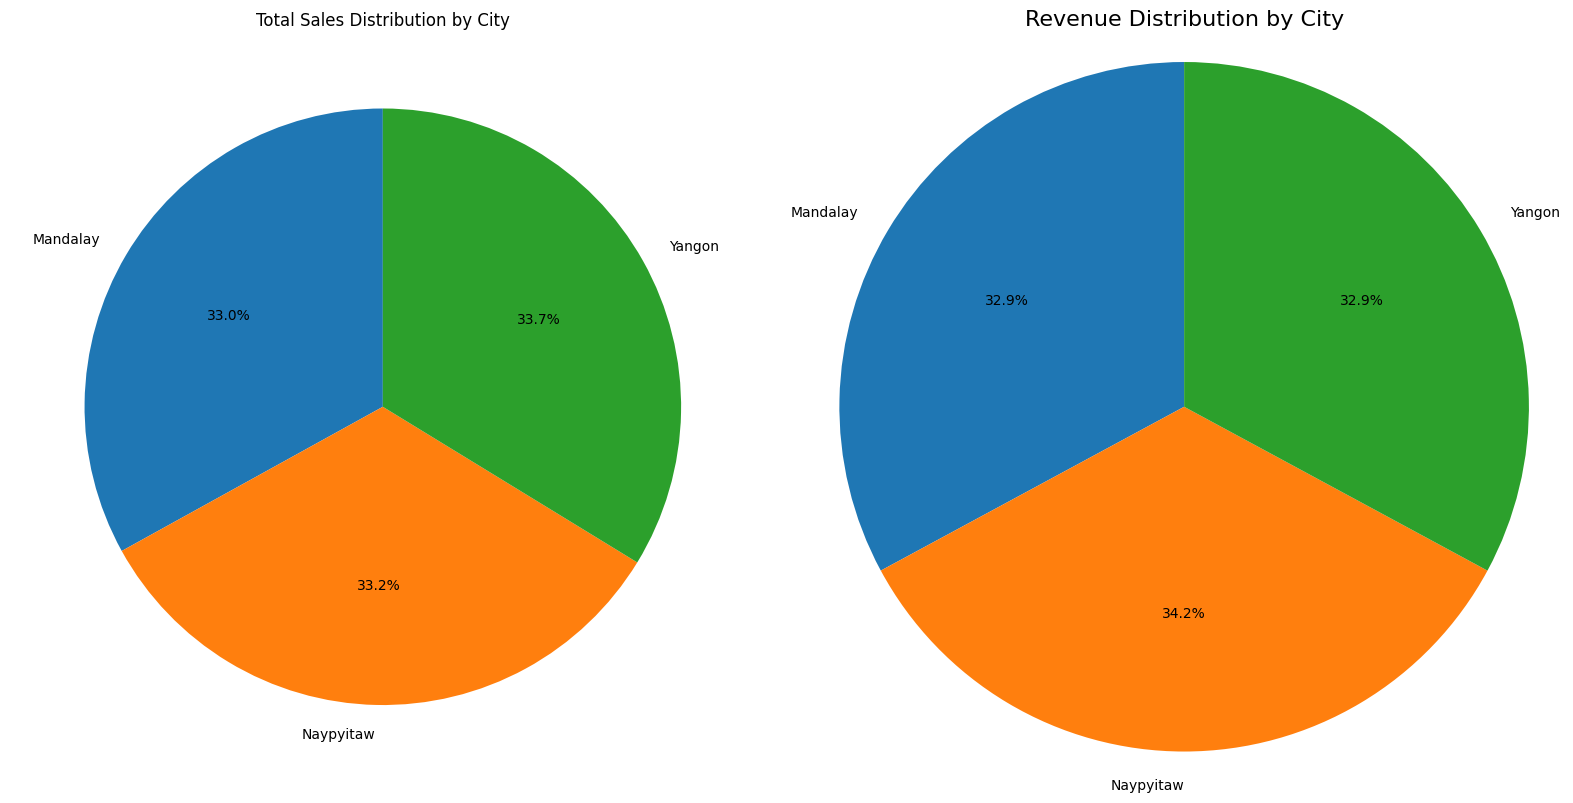

In [6]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
total_sales_city.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Total Sales Distribution by City')
plt.ylabel('')

city_revenue = revenue.groupby("City").sum()
plt.subplot(1, 2, 2)
plt.pie(city_revenue, labels=city_revenue.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Revenue Distribution by City', fontsize=16)

plt.tight_layout()
plt.show()


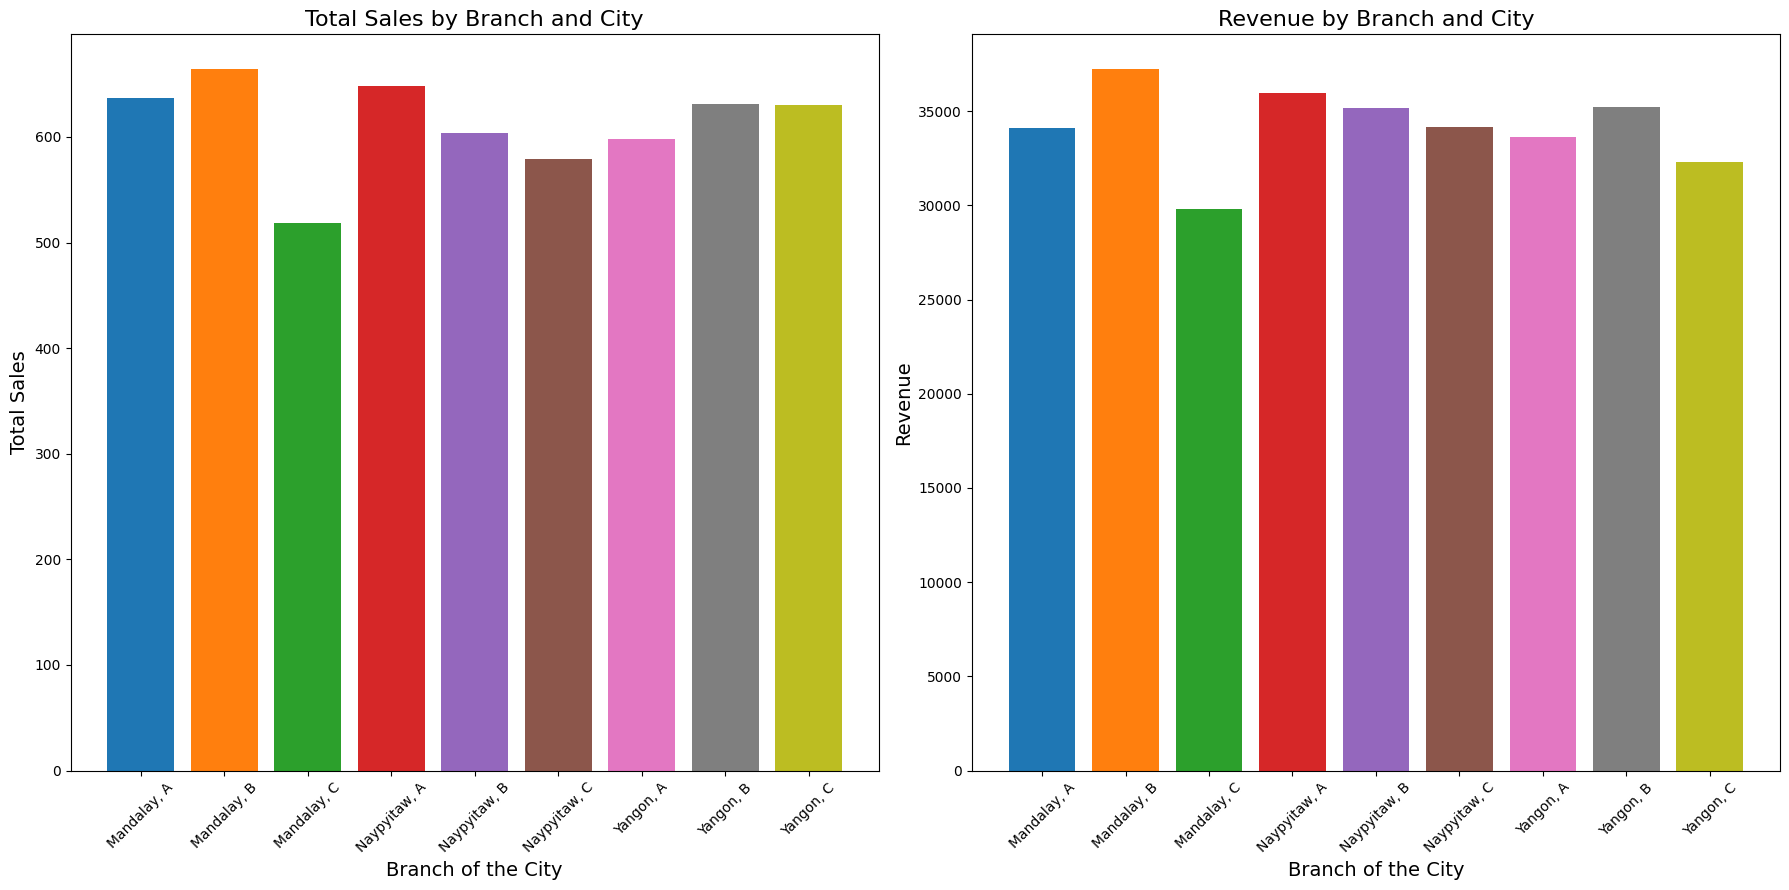

In [7]:
plt.figure(figsize=(18, 9))

plt.subplot(1, 2, 1)
for i, (city, branch) in enumerate(total_sales_branch_city.index):
    plt.bar(i, total_sales_branch_city[(city, branch)])
plt.xlabel('Branch of the City', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(range(len(total_sales_branch_city)), [f'{city}, {branch}' for city, branch in total_sales_branch_city.index], rotation=45,)
plt.title('Total Sales by Branch and City', fontsize=16)

plt.subplot(1, 2, 2)
for i, (city, branch) in enumerate(revenue.index):
    plt.bar(i, revenue[(city, branch)])
plt.xlabel('Branch of the City', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xticks(range(len(revenue)), [f'{city}, {branch}' for city, branch in revenue.index], rotation=45)
plt.title('Revenue by Branch and City', fontsize=16)

plt.tight_layout()
plt.show()

Sales (on the basis of quantity) has been the maximum in Yangon City but the best performing branch is Branch A in *Mandalay*

The most Revenue is generated in the city of Naypyitaw but if we see the best performing branch in terms of revenue, it is branch B in Mandalay

# PART **B**

In [8]:
average = data.groupby(['City', 'Branch'])['Unit price'].mean()
print("Average price of an item sold at each branch of the city:")
print(average)

Average price of an item sold at each branch of the city:
City       Branch
Mandalay   A         53.353866
           B         56.133305
           C         57.958316
Naypyitaw  A         54.123182
           B         57.785688
           C         57.941009
Yangon     A         55.639298
           B         56.011062
           C         52.684602
Name: Unit price, dtype: float64


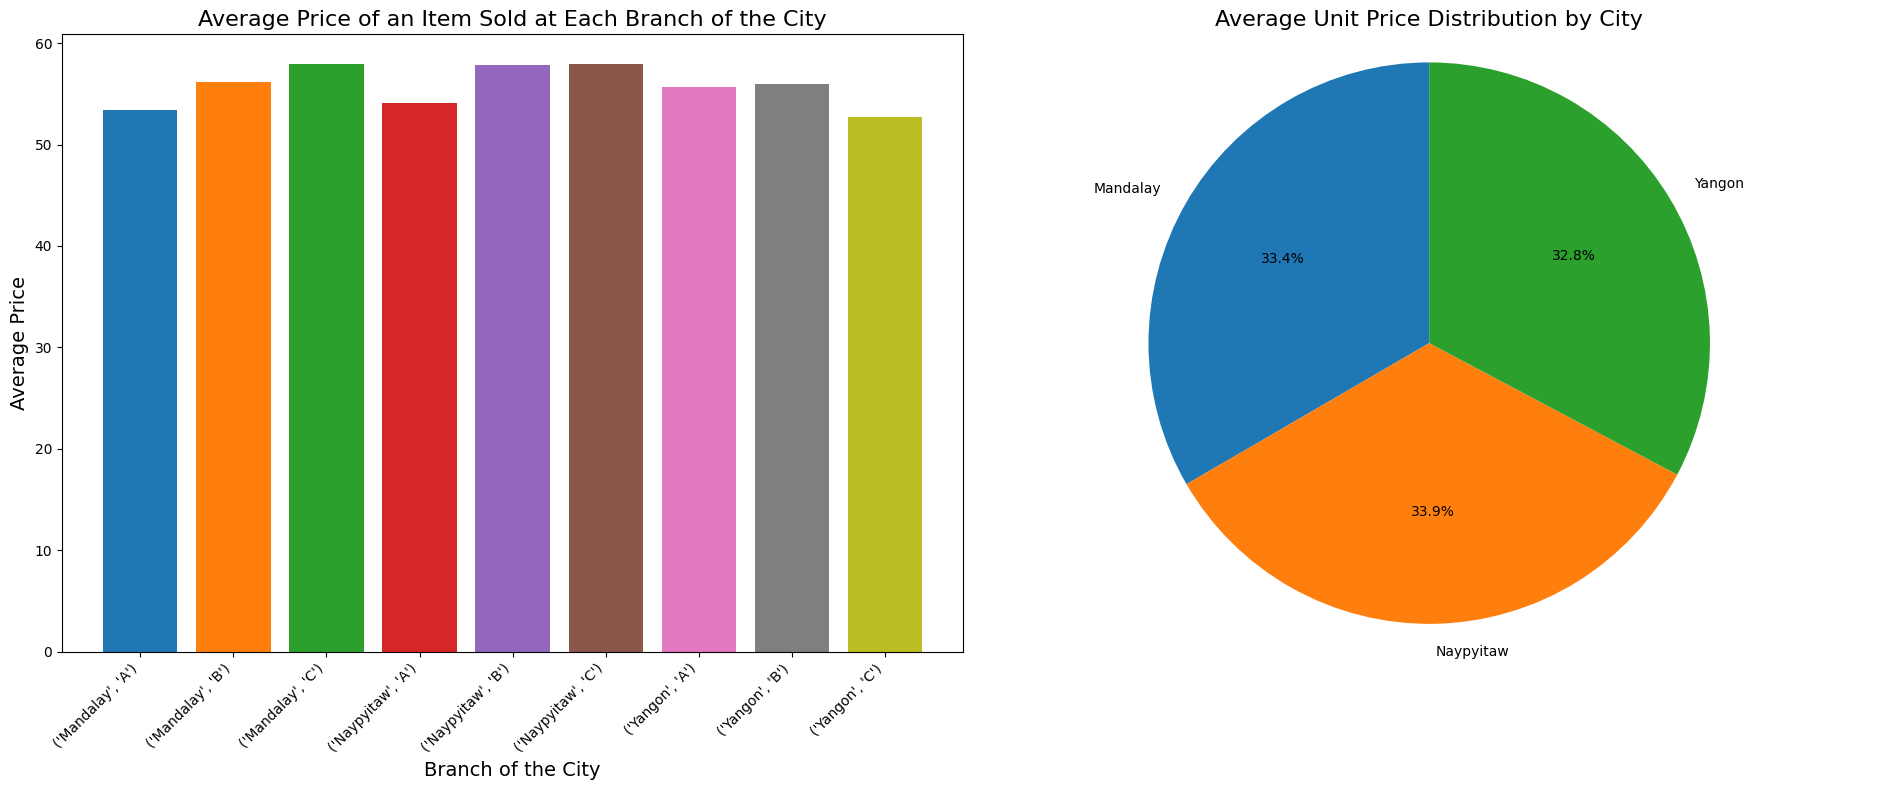

In [9]:
plt.figure(figsize=(19, 8))

plt.subplot(1, 2, 1)
for i, (city, branch) in enumerate(revenue.index):
    plt.bar(i, average[(city, branch)])
plt.xlabel('Branch of the City', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(range(len(average)), average.index, rotation=45, ha='right')
plt.title('Average Price of an Item Sold at Each Branch of the City', fontsize=16)


plt.subplot(1, 2, 2)
city_average = average.groupby("City").mean()
plt.pie(city_average, labels=city_average.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Average Unit Price Distribution by City', fontsize=16)
plt.tight_layout()
plt.show()

Average Unit Price is maximum in Naypyitaw but branch-wise it is the highest in branch C, Mandalay.

# PART **C**

In [10]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Month'] = data['Date'].dt.month

#Product Line

In [11]:
pl_monthly_revenue = data.groupby(['Month', 'Product line'])['Revenue'].sum().unstack()
pl_monthly_revenue

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Month,,,,,,
1,17934.56,18423.92,18638.60,15603.02,19518.80,20635.26
2,16536.10,18104.63,19047.96,13906.91,11842.27,13152.01
3,17279.37,15191.35,15784.72,17341.25,19935.99,18710.66


In [12]:
pl_monthly_sales = data.groupby(['Month', 'Product line'])['Quantity'].sum().unstack()
pl_monthly_sales

Product line,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
Month,,,,,,
1,333,336,325,254,342,375
2,313,295,349,266,205,226
3,325,271,278,334,364,319


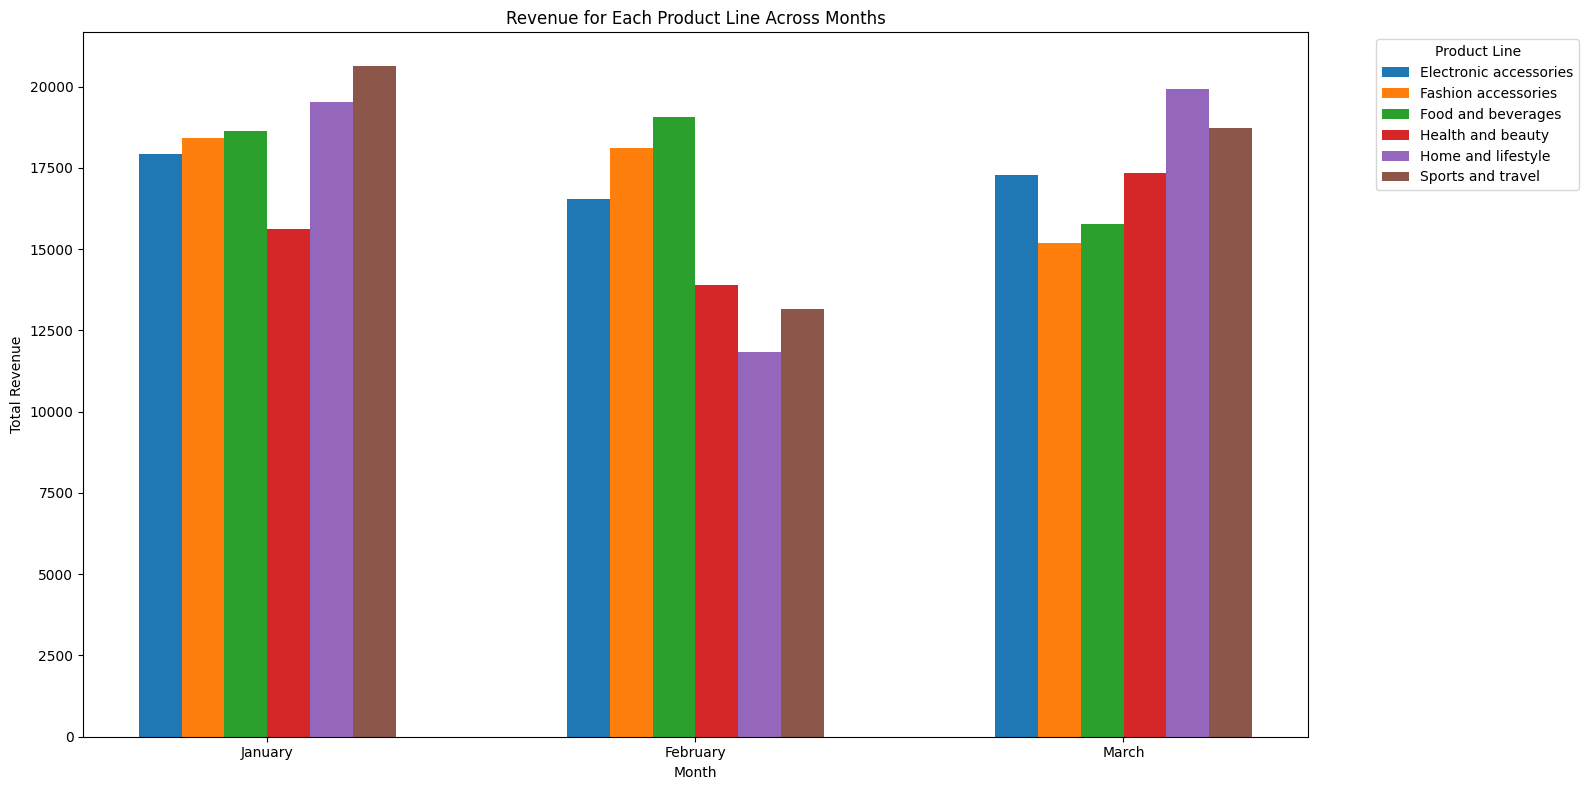

In [13]:
bar_width = 0.1
x = np.arange(3)

plt.figure(figsize=(16, 8))

for i, (product_line, revenue) in enumerate(pl_monthly_revenue.items()):
    plt.bar(x + i * bar_width + (0.5 * bar_width * (len(pl_monthly_revenue) - 1)), revenue, width=bar_width, color=plt.cm.tab10(i), label=product_line)

plt.title('Revenue for Each Product Line Across Months')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(x + (1.165*len(pl_monthly_revenue) * bar_width),
           ['January', 'February', 'March'])
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

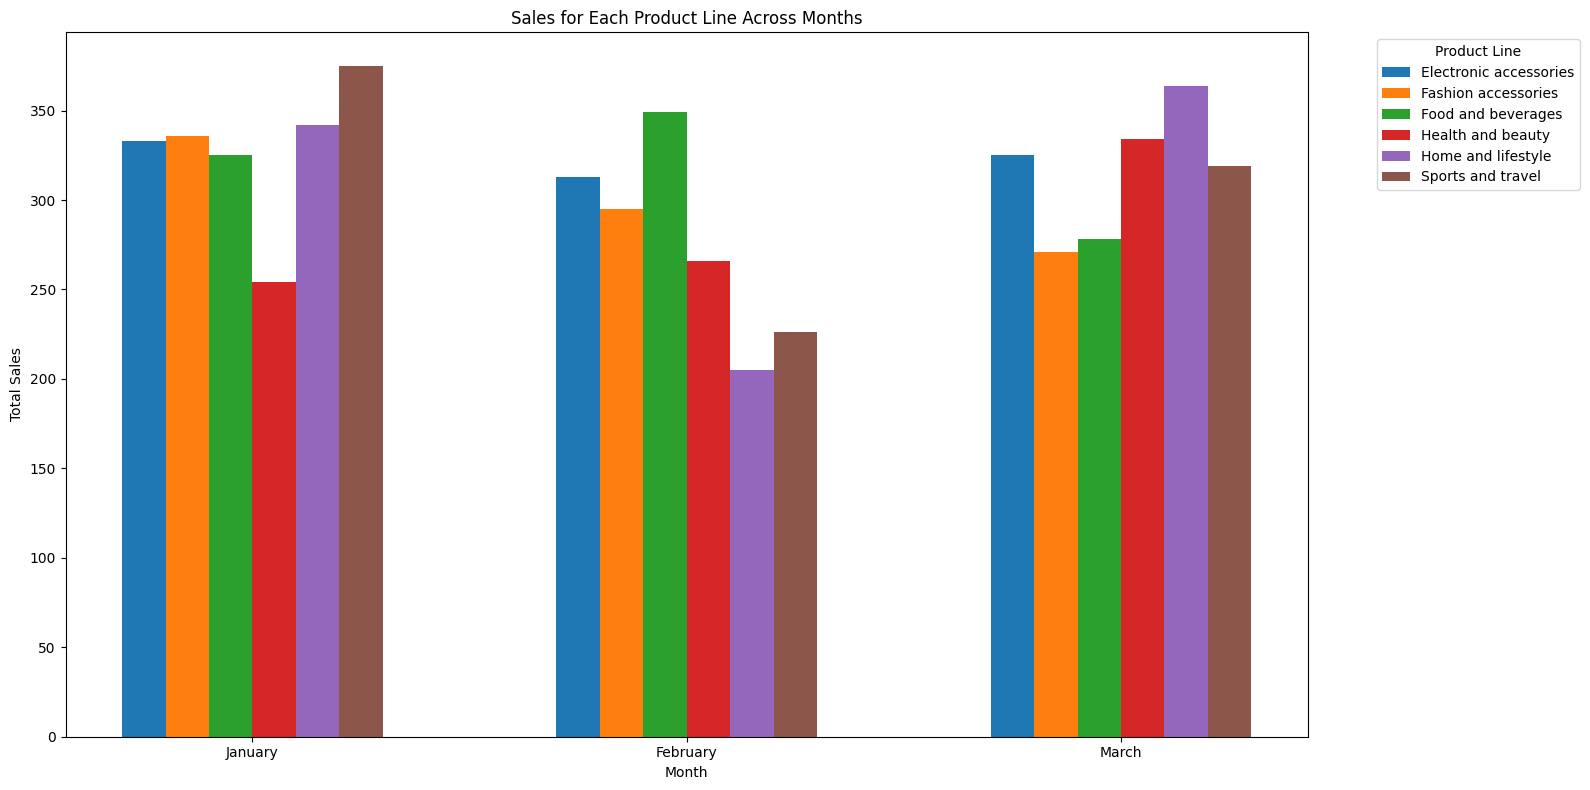

In [14]:
bar_width = 0.1
x = np.arange(3)

plt.figure(figsize=(16, 8))

for i, (product_line, sales) in enumerate(pl_monthly_sales.items()):
    plt.bar(x + i * bar_width + (0.5 * bar_width * (len(pl_monthly_sales) - 1)), sales, width=bar_width, color=plt.cm.tab10(i), label=product_line)

plt.title('Sales for Each Product Line Across Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(x + (1.165*len(pl_monthly_sales) * bar_width),
           ['January', 'February', 'March'])
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
gen_monthly_revenue = data.groupby(['Month', 'Gender'])['Revenue'].sum().unstack()
gen_monthly_revenue

Gender,Female,Male
Month,,
1,56322.84,54431.32
2,53652.91,38936.97
3,49912.75,54330.59


In [16]:
gen_monthly_sales = data.groupby(['Month', 'Gender'])['Quantity'].sum().unstack()
gen_monthly_sales

Gender,Female,Male
Month,,
1,1019,946
2,951,703
3,899,992


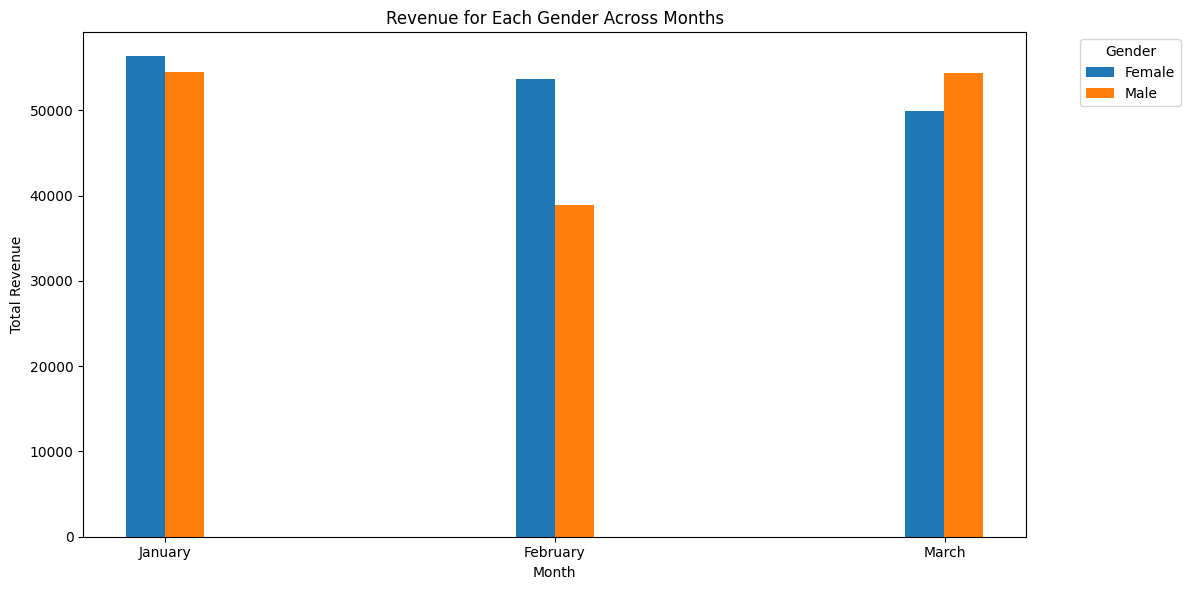

In [17]:
plt.figure(figsize=(12, 6))

for i, (gender, revenue) in enumerate(gen_monthly_revenue.items()):
    plt.bar(x + (i * bar_width), revenue, width=bar_width, label=gender)

plt.title('Revenue for Each Gender Across Months')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(x + (0.5 * bar_width) + (0.001*bar_width * (len(gen_monthly_revenue) - 1)),
           ['January', 'February', 'March'])
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

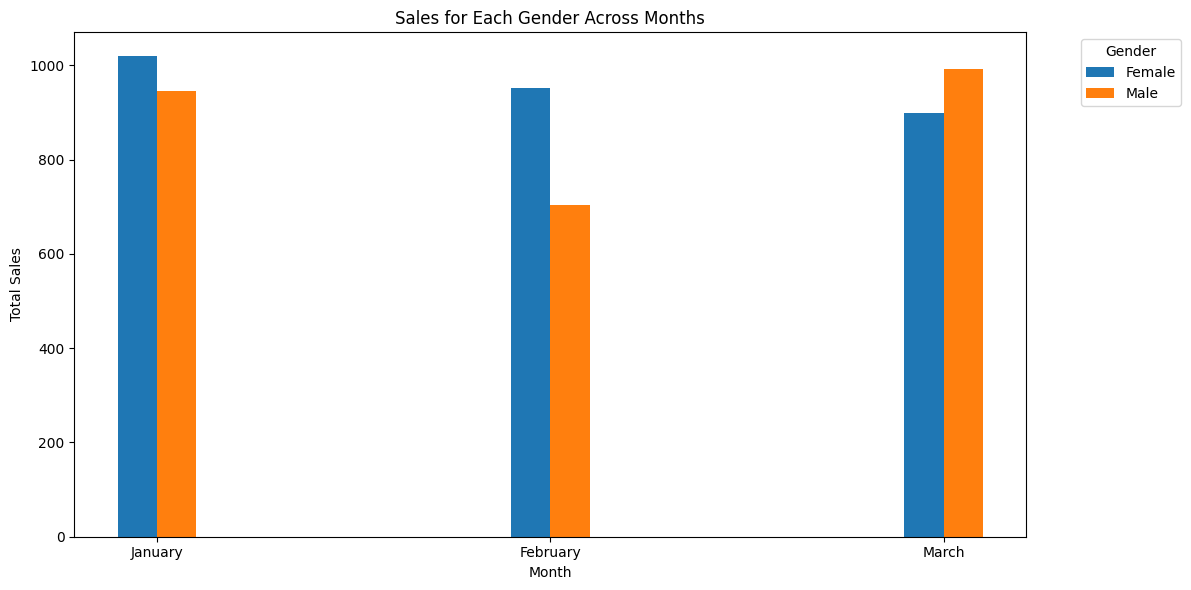

In [18]:
plt.figure(figsize=(12, 6))

for i, (gender, sales) in enumerate(gen_monthly_sales.items()):
    plt.bar(x + (i * bar_width), sales, width=bar_width, label=gender)

plt.title('Sales for Each Gender Across Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(x + (0.5 * bar_width) + (0.001*bar_width * (len(gen_monthly_sales) - 1)),
           ['January', 'February', 'March'])
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
pay_monthly_revenue = data.groupby(['Month', 'Payment'])['Revenue'].sum().unstack()
pay_monthly_revenue

Payment,Cash,Credit card,Ewallet
Month,,,
1,39781.03,36425.31,34547.82
2,34044.13,29866.69,28679.06
3,33038.24,29676.64,41528.46


In [20]:
pay_monthly_sales = data.groupby(['Month', 'Payment'])['Quantity'].sum().unstack()
pay_monthly_sales

Payment,Cash,Credit card,Ewallet
Month,,,
1,708,622,635
2,596,505,553
3,592,595,704


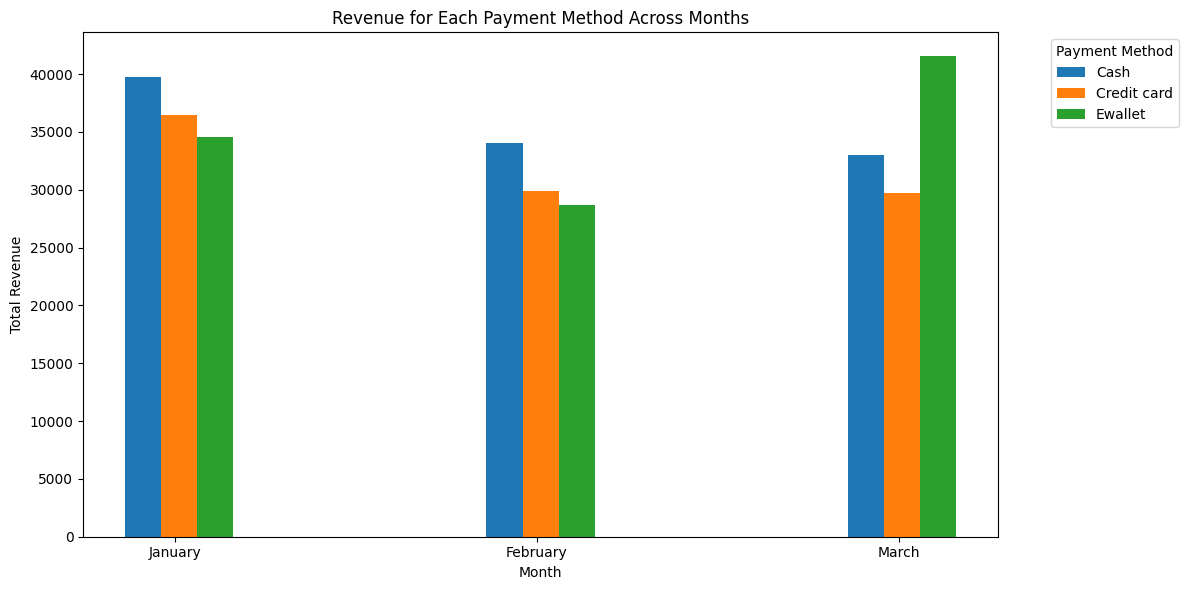

In [21]:
plt.figure(figsize=(12, 6))

for i, (payment, revenue) in enumerate(pay_monthly_revenue.items()):
    plt.bar(x + (i * bar_width), revenue, width=bar_width, label=payment)

plt.title('Revenue for Each Payment Method Across Months')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(x + (0.5 * bar_width) + (0.2 * bar_width * (len(pay_monthly_revenue) - 1)),
           ['January', 'February', 'March'])
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

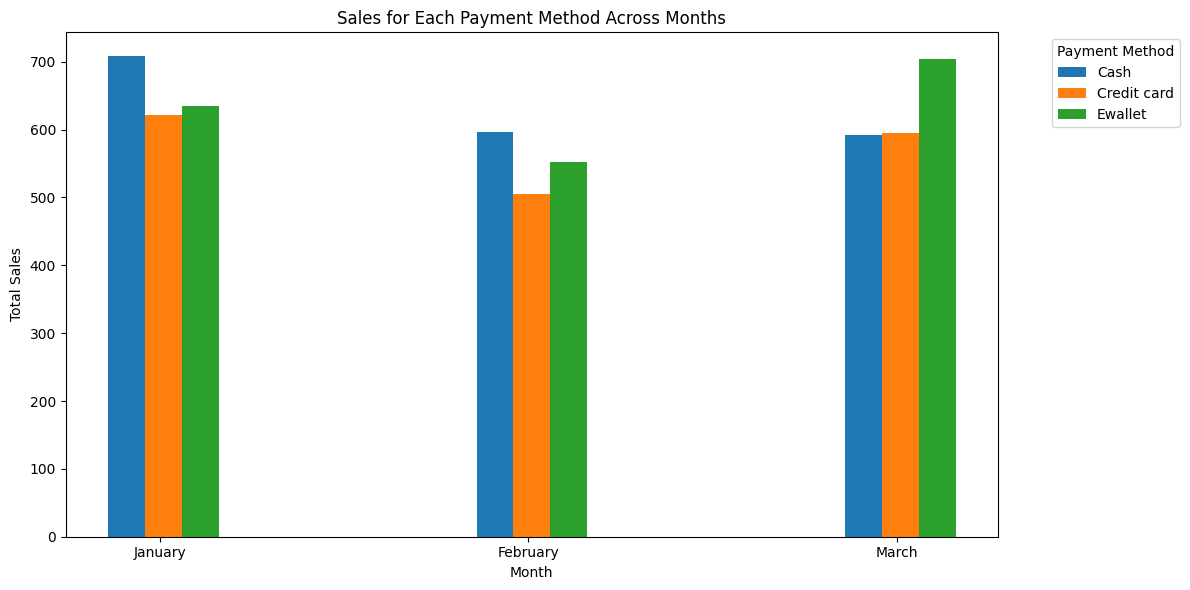

In [22]:
plt.figure(figsize=(12, 6))

for i, (payment, sales) in enumerate(pay_monthly_sales.items()):
    plt.bar(x + (i * bar_width), sales, width=bar_width, label=payment)

plt.title('Sales for Each Payment Method Across Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(x + (0.5 * bar_width) + (0.2 * bar_width * (len(pay_monthly_sales) - 1)),
           ['January', 'February', 'March'])
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [23]:
monthly_total_revenue = data.groupby('Month')['Revenue'].sum()
monthly_total_revenue

Month
1    110754.16
2     92589.88
3    104243.34
Name: Revenue, dtype: float64

In [24]:
monthly_total_sales = data.groupby('Month')['Quantity'].sum()
monthly_total_sales

Month
1    1965
2    1654
3    1891
Name: Quantity, dtype: int64

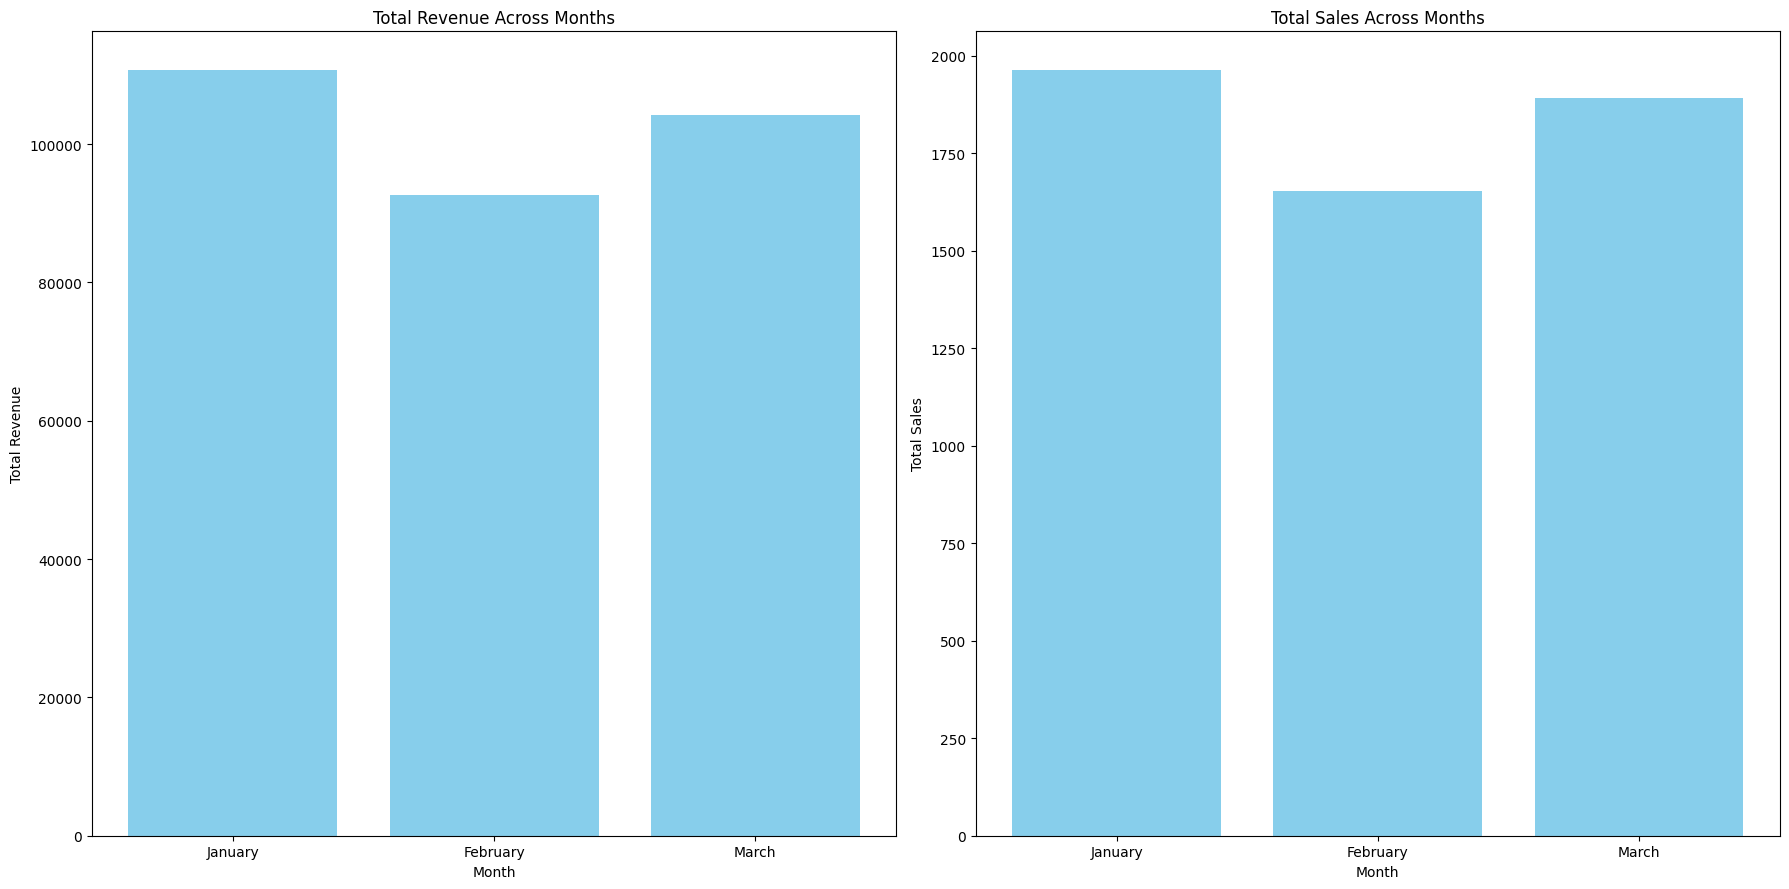

In [25]:
plt.figure(figsize=(18, 9))

plt.subplot(1,2,1)
plt.bar(monthly_total_revenue.index, monthly_total_revenue, color='skyblue')
plt.title('Total Revenue Across Months')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks([1, 2, 3], ['January', 'February', 'March'])

plt.subplot(1,2,2)
plt.bar(monthly_total_sales.index, monthly_total_sales, color='skyblue')
plt.title('Total Sales Across Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks([1, 2, 3], ['January', 'February', 'March'])

plt.tight_layout()
plt.show()


In [26]:
monthly_total_revenue = data.groupby('Month')['Revenue'].sum()
monthly_total_revenue

Month
1    110754.16
2     92589.88
3    104243.34
Name: Revenue, dtype: float64

In [27]:
monthly_total_sales = data.groupby('Month')['Quantity'].sum()
monthly_total_sales

Month
1    1965
2    1654
3    1891
Name: Quantity, dtype: int64

In [28]:
revenue_growth_rate_jan_feb = (monthly_total_revenue.loc[2] - monthly_total_revenue.loc[1]) / monthly_total_revenue.loc[1]
revenue_growth_rate_jan_feb

-0.1640053971787606

In [29]:
sales_growth_rate_jan_feb = (monthly_total_sales.loc[2] - monthly_total_sales.loc[1]) / monthly_total_sales.loc[1]
sales_growth_rate_jan_feb

-0.15826972010178117

In [30]:
revenue_growth_rate_feb_march = (monthly_total_revenue.loc[3] - monthly_total_revenue.loc[2]) / monthly_total_revenue.loc[2]
revenue_growth_rate_feb_march

0.12586105522547378

In [31]:
sales_growth_rate_feb_march = (monthly_total_sales.loc[3] - monthly_total_sales.loc[2]) / monthly_total_sales.loc[2]
sales_growth_rate_feb_march

0.14328899637243048

Overall, in the month of January, the revenue and sales were very good [110754.16 and 1965 respectively].

There were significant drops in revenue [Overall Revenue Growth Rate = -0.1640053971787606] and sales [Overall Sales Growth Rate = -0.15826972010178117] in February [Total: 92589.88 and 1654].

There were improvements in revenue [Overeall Revenue Growth Rate = 0.12586105522547378] and sales [Overeall Sales Growth Rate = 0.14328899637243048] in the month of March [104243.34 and 1891].

Areas of Focus are:
Product Line- Fashion Accessories & Food and Beverages
Gender-Female Consumers
Payment Mode-Cash and Credit Cards
                  